In [94]:
using Catlab.CategoricalAlgebra.CSets
using Catlab.Present, Catlab.Graphics, Catlab.Graphs

# Firt make a graph schema to see what's going on

@present SchemaGraph(FreeSchema) begin
  V::Ob
  E::Ob
  src::Hom(E,V)
  tgt::Hom(E,V)
end

Presentation{Schema,Symbol}(Catlab.Theories.FreeSchema, (Ob = Catlab.Theories.FreeSchema.Ob{:generator}[V, E], Hom = Catlab.Theories.FreeSchema.Hom{:generator}[src, tgt], Data = Catlab.Theories.FreeSchema.Data{:generator}[], Attr = Catlab.Theories.FreeSchema.Attr{:generator}[]), Dict(:src => (:Hom => 1),:V => (:Ob => 1),:E => (:Ob => 2),:tgt => (:Hom => 2)), Pair[])

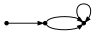

In [95]:
# Make a graph over that schema
g = Graph()
add_parts!(g, :V, 3)
add_parts!(g, :E, 4, src=[1,2,2,3], tgt=[2,3,3,3])
to_graphviz(g)

In [96]:
# Shema for the (two state) Ising model 
@present SchemaIsingModel(FreeSchema) begin
  V1::Ob
  V2::Ob
  E::Ob
  L1::Ob
  L2::Ob
  src1::Hom(L1,V1)
  tgt1::Hom(L1,V1)
  src2::Hom(L2,V2)
  tgt2::Hom(L2,V2)
  p::Hom(E, V1)
  q::Hom(E, V2)
  
end


Presentation{Schema,Symbol}(Catlab.Theories.FreeSchema, (Ob = Catlab.Theories.FreeSchema.Ob{:generator}[V1, V2, E, L1, L2], Hom = Catlab.Theories.FreeSchema.Hom{:generator}[src1, tgt1, src2, tgt2, p, q], Data = Catlab.Theories.FreeSchema.Data{:generator}[], Attr = Catlab.Theories.FreeSchema.Attr{:generator}[]), Dict(:V1 => (:Ob => 1),:V2 => (:Ob => 2),:p => (:Hom => 5),:L2 => (:Ob => 5),:L1 => (:Ob => 4),:tgt1 => (:Hom => 2),:E => (:Ob => 3),:src2 => (:Hom => 3),:q => (:Hom => 6),:tgt2 => (:Hom => 4)…), Pair[])

In [97]:
# Make it into a type??
const IsingModel = ACSetType(SchemaIsingModel, index=[:src1,:tgt1,:src2,:tgt2]) # creates RoadMap type

Catlab.CSetDataStructures.AttributedCSet{CatDesc{(:V1, :V2, :E, :L1, :L2),(:src1, :tgt1, :src2, :tgt2, :p, :q),(4, 4, 5, 5, 3, 3),(1, 1, 2, 2, 1, 2)},AttrDesc{CatDesc{(:V1, :V2, :E, :L1, :L2),(:src1, :tgt1, :src2, :tgt2, :p, :q),(4, 4, 5, 5, 3, 3),(1, 1, 2, 2, 1, 2)},(),(),(),()},Tuple{},(:src1, :src2, :tgt1, :tgt2),(),Tables,Indices} where Indices<:NamedTuple where Tables<:NamedTuple

In [99]:
# Create an instance of that schema
i = IsingModel()
add_parts!(i, :V1, 3)
add_parts!(i, :V2, 1)
add_parts!(i, :E, 2, p=[1,3], q=[1,1])
add_parts!(i, :L1, 2, src1=[1,2], tgt1=[2,3])
add_parts!(i, :L2, 0, src1=[], tgt1=[])

print(i)

CSet(
  V1 = 1:3,
  V2 = 1:1,
  E = 1:2,
  L1 = 1:2,
  L2 = 1:0,
  src1 : L1 → V1 = [1, 2],
  tgt1 : L1 → V1 = [2, 3],
  src2 : L2 → V2 = Int64[],
  tgt2 : L2 → V2 = Int64[],
  p : E → V1 = [1, 3],
  q : E → V2 = [1, 1])